In [2]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os
import sys

sys.path.append("../..")

from blume.process import read, compute, plot_file
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

# First Order

In [191]:
result = Results(varying_param="chi", range=[4, 6, 10, 14, 20, 32])
params = ModelParameters(model = "blume", var_range=(1.9, 2.1), step=0.0001, tol=1e-9, max_steps=int(10e9), use_prev=True, temperature=0.5)
result.get(params, sweeping_param="coupling")

chi=4: 100%|██████████| 2001/2001 [00:49<00:00, 40.24it/s]


Saving data in folder: '25-05 21:07'
Done 



chi=6: 100%|██████████| 2001/2001 [00:47<00:00, 42.42it/s]


Saving data in folder: '25-05 21:07'
Done 



chi=10: 100%|██████████| 2001/2001 [00:51<00:00, 38.87it/s]


Saving data in folder: '25-05 21:07'
Done 



chi=14: 100%|██████████| 2001/2001 [01:01<00:00, 32.43it/s]


Saving data in folder: '25-05 21:07'
Done 



chi=20: 100%|██████████| 2001/2001 [01:22<00:00, 24.24it/s]


Saving data in folder: '25-05 21:07'
Done 



chi=32: 100%|██████████| 2001/2001 [06:07<00:00,  5.45it/s]


Saving data in folder: '25-05 21:07'
Done 



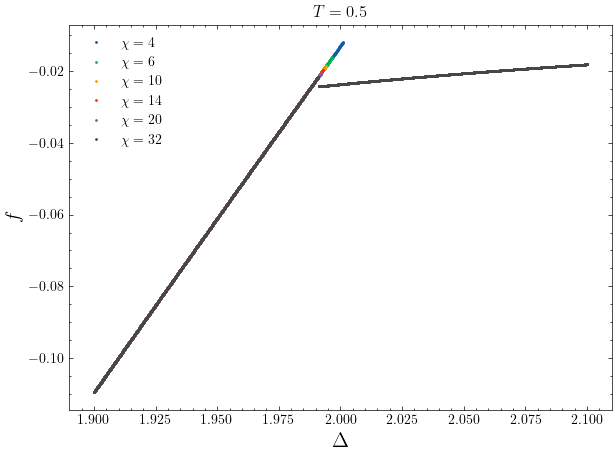

In [192]:
plt.figure(figsize = (7, 5))

for idx, chi in enumerate([4, 6, 10, 14, 20, 32]):    
    data = read("25-05 21:07", f"chi{chi}")
    energies = compute(Prop.f, data)
    couplings = data["couplings"]
    plt.plot(couplings, energies, "o", markersize = 1, label=f"$\chi = {chi}$")

plt.title("$T = 0.5$")
plt.xlabel("$\Delta$", fontsize = 15)
plt.ylabel("$f$", fontsize = 15)
plt.legend()

plt.show()

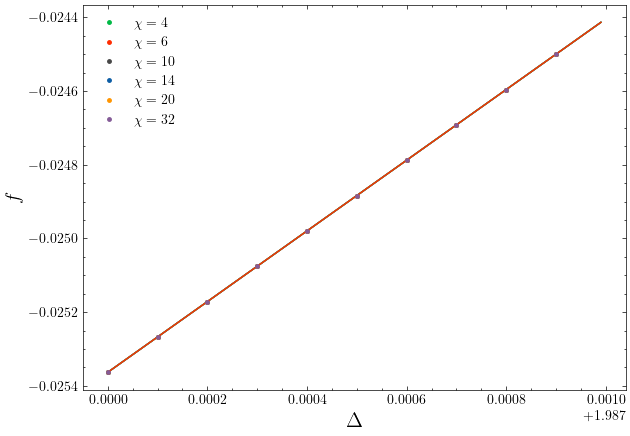

In [209]:
from scipy.optimize import curve_fit

def linear(x, a, b):
    return a*x + b

params_norm = []

plt.figure(figsize=(7, 5))
for idx, chi in enumerate([4, 6, 10, 14, 20, 32]):    
    data = read("25-05 21:07", f"chi{chi}")
    energies = compute(Prop.f, data)[870:880]
    couplings = data["couplings"][870:880]
    result = curve_fit(linear, couplings, energies)
    params_norm.append((result[0][0], result[0][1]))
    x = [x for x in np.arange(1.987, 1.988, 0.00001)]
    y = [linear(val, result[0][0], result[0][1]) for val in x] 
    plt.plot(x, y)
    plt.plot(couplings, energies, "o", markersize = 2.5, label=f"$\chi = {chi}$")
    

plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel("$f$", fontsize = 15)
plt.legend()
plt.show()


In [203]:
couplings = [coupling for coupling in np.arange(1.9, 2.1, 0.0001)]
couplings.reverse()

result = Results(varying_param="chi", range=[4, 6, 10, 14, 20, 32])
params = ModelParameters(model = "blume", var_range=couplings, tol=1e-9, max_steps=int(10e9), use_prev=True, temperature=0.5)
result.get(params, sweeping_param="coupling")

chi=4: 100%|██████████| 2001/2001 [00:44<00:00, 44.83it/s]


Saving data in folder: '25-05 21:28'
Done 



chi=6: 100%|██████████| 2001/2001 [00:45<00:00, 44.40it/s]


Saving data in folder: '25-05 21:28'
Done 



chi=10: 100%|██████████| 2001/2001 [00:49<00:00, 40.27it/s]


Saving data in folder: '25-05 21:28'
Done 



chi=14: 100%|██████████| 2001/2001 [01:01<00:00, 32.61it/s]


Saving data in folder: '25-05 21:28'
Done 



chi=20: 100%|██████████| 2001/2001 [01:21<00:00, 24.68it/s]


Saving data in folder: '25-05 21:28'
Done 



chi=32: 100%|██████████| 2001/2001 [06:03<00:00,  5.50it/s]


Saving data in folder: '25-05 21:28'
Done 



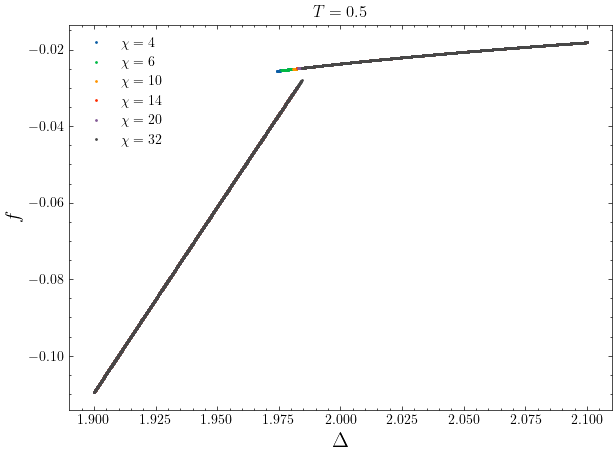

In [204]:
plt.figure(figsize = (7, 5))

for idx, chi in enumerate([4, 6, 10, 14, 20, 32]):    
    data = read("25-05 21:28", f"chi{chi}")
    energies = compute(Prop.f, data)
    couplings = data["couplings"]
    plt.plot(couplings, energies, "o", markersize = 1, label=f"$\chi = {chi}$")

plt.title("$T = 0.5$")
plt.xlabel("$\Delta$", fontsize = 15)
plt.ylabel("$f$", fontsize = 15)
plt.legend()

plt.show()

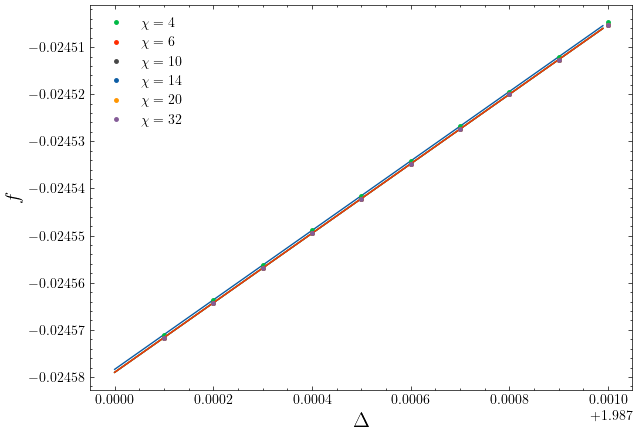

In [207]:
params_inv = []

plt.figure(figsize=(7, 5))
for idx, chi in enumerate([4, 6, 10, 14, 20, 32]):    
    data = read("25-05 21:28", f"chi{chi}")
    energies = compute(Prop.f, data)[1120:1130]
    couplings = data["couplings"][1120:1130]
    result = curve_fit(linear, couplings, energies)
    params_inv.append((result[0][0], result[0][1]))
    x = [x for x in np.arange(1.987, 1.988, 0.00001)]
    y = [linear(val, result[0][0], result[0][1]) for val in x] 
    plt.plot(x, y)
    plt.plot(couplings, energies, "o", markersize = 2.5, label=f"$\chi = {chi}$")
    

plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel("$f$", fontsize = 15)
plt.legend()
plt.show()



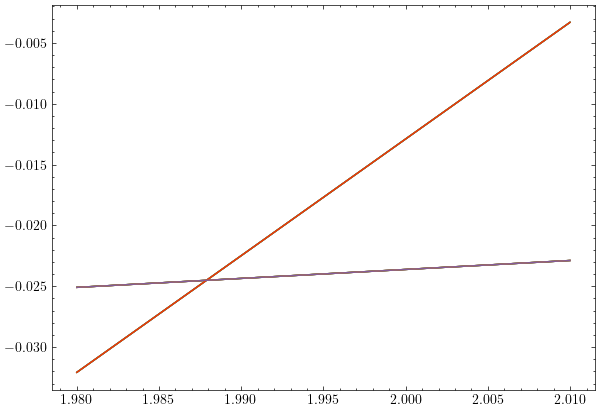

In [210]:
from scipy.optimize import minimize


plt.figure(figsize=(7, 5))
crits = []

for param in list(zip(params_norm, params_inv)):
    
    x = [x for x in np.arange(1.98, 2.01, 0.00001)]
    y = [linear(val, param[0][0], param[0][1]) for val in x] 
    plt.plot(x, y)
    x = [x for x in np.arange(1.98, 2.01, 0.00001)]
    y = [linear(val, param[1][0], param[1][1]) for val in x] 
    plt.plot(x, y)
    

    res = minimize(lambda t: (linear(t, param[0][0], param[0][1]) - linear(t,param[1][0], param[1][1]))**2, 1, tol = 1e-6)
    crits.append(res.x)
plt.show()

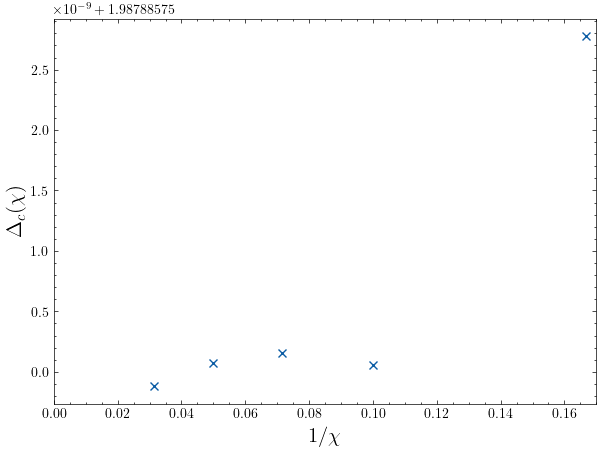

In [217]:
chis = [4, 6, 10, 14, 20, 32]
inv_chis = [1/chi for chi in chis]
plt.figure(figsize=(7, 5))
plt.plot(inv_chis[1:], crits[1:], "x")
plt.xlabel("$1/ \chi$", fontsize = 15)
plt.ylabel("$\Delta_c(\chi)$", fontsize= 15)
plt.xlim(0, 0.17)
plt.show()

In [246]:
print(f"delta_c = {round(float(crits[-1]), 5)}(1)")

delta_c = 1.98789(1)


In [233]:
result = Results()
params = ModelParameters(model = "blume", var_range=(1.9, 2.1), step=0.00001, tol=1e-9, max_steps=int(10e9), use_prev=True, temperature=0.5, chi=16)
result.get(params, sweeping_param="coupling")

100%|██████████| 20001/20001 [10:02<00:00, 33.22it/s] 


Saving data in folder: '25-05 22:15'
Done 



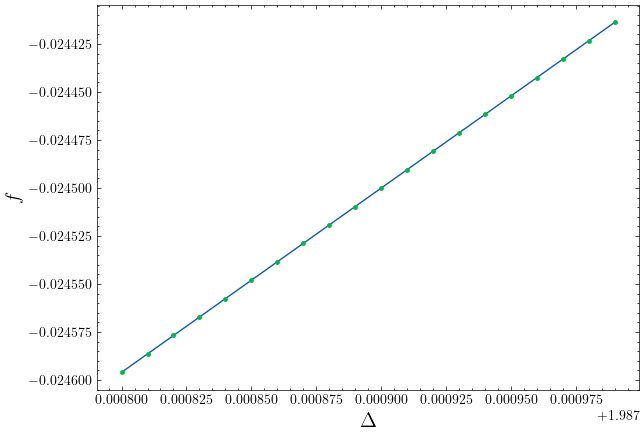

In [238]:
plt.figure(figsize=(7, 5))

data = read("25-05 22:15", "data")
energies = compute(Prop.f, data)[8780:8800]
couplings = data["couplings"][8780:8800]
result_norm = curve_fit(linear, couplings, energies)
x = [x for x in np.arange(1.9878, 1.9880, 0.00001)]
y = [linear(val, result[0][0], result[0][1]) for val in x] 
plt.plot(x, y)
plt.plot(couplings, energies, "o", markersize = 2.5)
    

plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel("$f$", fontsize = 15)
plt.show()

In [234]:
couplings = [coupling for coupling in np.arange(1.9, 2.1, 0.00001)]
couplings.reverse()

result = Results()
params = ModelParameters(model = "blume", var_range=couplings, tol=1e-9, max_steps=int(10e9), use_prev=True, temperature=0.5, chi=20)
result.get(params, sweeping_param="coupling")

100%|██████████| 20001/20001 [12:12<00:00, 27.32it/s]


Saving data in folder: '25-05 22:29'
Done 



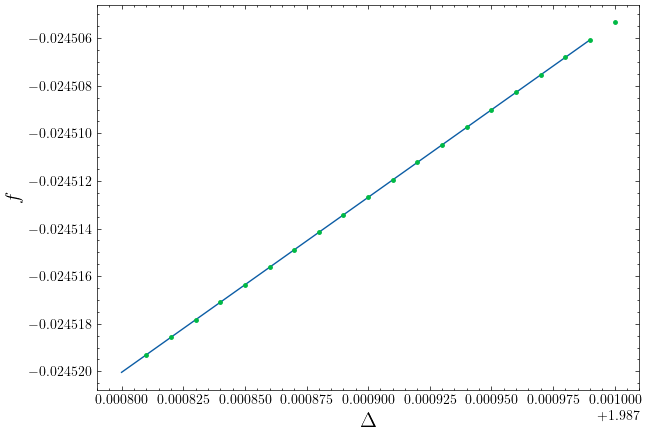

In [240]:
plt.figure(figsize=(7, 5))

data = read("25-05 22:29", "data")
energies = compute(Prop.f, data)[11200:11220]
couplings = data["couplings"][11200:11220]
result_inv = curve_fit(linear, couplings, energies)
x = [x for x in np.arange(1.9878, 1.9880, 0.00001)]
y = [linear(val, result_inv[0][0], result_inv[0][1]) for val in x]
plt.plot(x, y)
plt.plot(couplings, energies, "o", markersize=2.5)


plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel("$f$", fontsize=15)
plt.show()

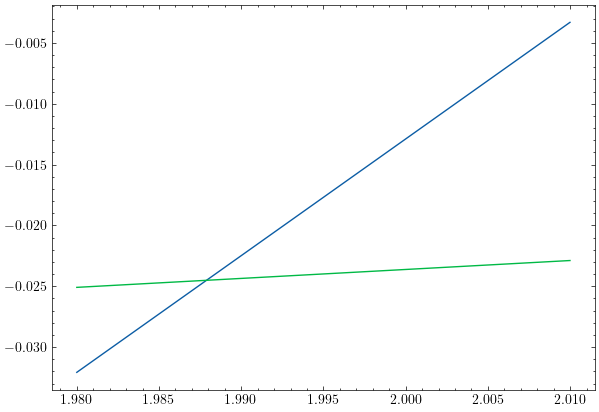

In [241]:
plt.figure(figsize=(7, 5))  
x = [x for x in np.arange(1.98, 2.01, 0.00001)]
y = [linear(val, result_norm[0][0], result_norm[0][1]) for val in x] 
plt.plot(x, y)
x = [x for x in np.arange(1.98, 2.01, 0.00001)]
y = [linear(val, result_inv[0][0], result_inv[0][1]) for val in x] 
plt.plot(x, y)
    

res = minimize(lambda t: (linear(t, param[0][0], param[0][1]) - linear(t,param[1][0], param[1][1]))**2, 1, tol = 1e-6)
plt.show()

In [243]:
float(res.x)

1.9878857498820977

# Second Order